**<font size="4">Όνομα:</font>** <font size="4">Κυλάφη Χριστίνα-Θεανώ</font> <br>**<font size="4">E-mail:</font>** <font size="4">lt1200012@di.uoa.gr</font><br>**<font size="4">AM:</font>** <font size="4">LT1200012</font>

<h1>M904 - DSP Project 3</h1>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import sounddevice as sd
import librosa
import os

<h2>Task 1</h2>

--> Using Autocorrelation <--
Fundamentals:
f0_a: 233.33333333333334
f0_o: 219.40298507462686
f0_e: 297.97297297297297


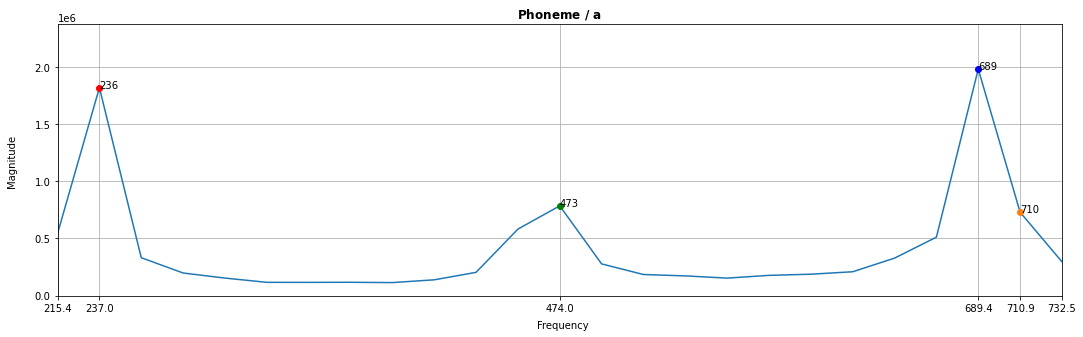

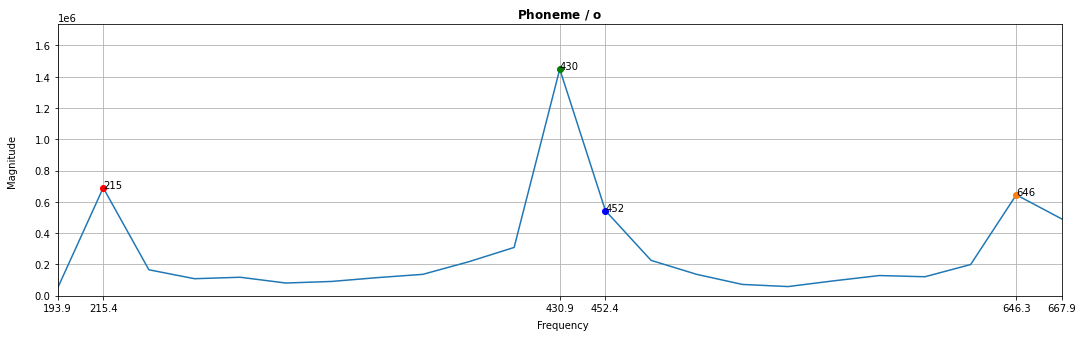

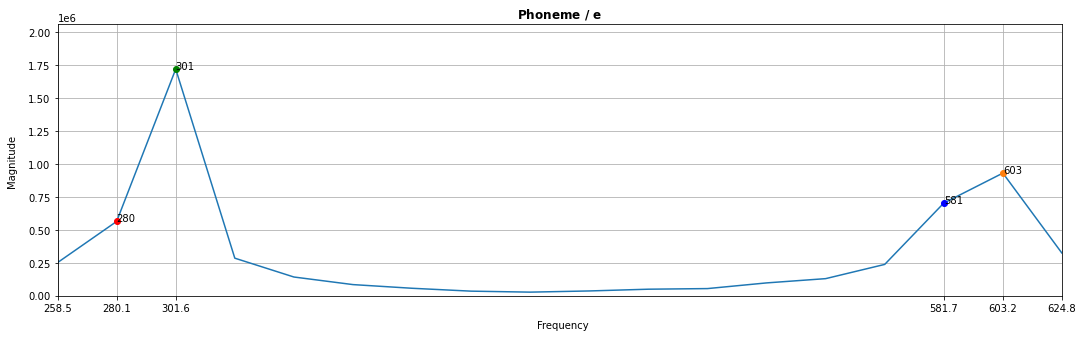

In [181]:
#individual plots

sr_a, a = wf.read('./data/a_audio.wav')
sr_o, o = wf.read('./data/o_audio.wav')
sr_e, e = wf.read('./data/e_audio.wav')

fs = 44100
power_of_2 = 11
w_size = 2**power_of_2
bins = w_size

a_signal =  a[a[:,0].size//2:a[:,0].size//2+w_size,0]
o_signal =  o[o[:,0].size//2:o[:,0].size//2+w_size,0]
e_signal =  e[e[:,0].size//2:e[:,0].size//2+w_size,0]

#test----------------------------------------------
# w = np.hanning( w_size )
# a_windowed = w*a_signal
# a_signal = a_windowed
# o_windowed = w*o_signal
# o_signal = o_windowed
# e_windowed = w*e_signal
# e_signal = e_windowed
#--------------------------------------------------

fft_a = np.fft.fft( a_signal )
fft_o = np.fft.fft( o_signal )
fft_e = np.fft.fft( e_signal )

# print(len(freq_bins))
mag_a = np.sqrt( np.power( fft_a.real , 2 ) + np.power( fft_a.imag , 2 ) )
mag_a = mag_a[:mag_a.size//2]

mag_o = np.sqrt( np.power( fft_o.real , 2 ) + np.power( fft_o.imag , 2 ) )
mag_o = mag_o[:mag_o.size//2]

mag_e = np.sqrt( np.power( fft_e.real , 2 ) + np.power( fft_e.imag , 2 ) )
mag_e = mag_e[:mag_e.size//2]

mag_list = [mag_a,mag_o,mag_e]

freq_bins = np.linspace(0,fs,bins)


#Autocorrelation - Fundamental frequency ----------

ifft_a = np.fft.ifft(mag_a)
# plt.plot(freq_bins[:mag_a.size],ifft_a)
ifft_o = np.fft.ifft(mag_o)
# plt.plot(freq_bins[:mag_o.size],ifft_o)
ifft_e = np.fft.ifft(mag_e)
# plt.plot(freq_bins[:mag_e.size],ifft_e)

# print(np.argmax(test[2:]))

r_a = librosa.autocorrelate(a[:,0])
r_o = librosa.autocorrelate(o[:,0])
r_e = librosa.autocorrelate(e[:,0])

midi_hi = 120.0
midi_lo = 12.0
f_hi = librosa.midi_to_hz(midi_hi)
f_lo = librosa.midi_to_hz(midi_lo)
t_lo = fs/f_hi
t_hi = fs/f_lo
r_a[:int(t_lo)] = 0
r_a[int(t_hi):] = 0
r_o[:int(t_lo)] = 0
r_o[int(t_hi):] = 0
r_e[:int(t_lo)] = 0
r_e[int(t_hi):] = 0

t_max_a = r_a.argmax()
t_max_a = float(fs)/t_max_a
t_max_o = r_o.argmax()
t_max_o = float(fs)/t_max_o
t_max_e = r_e.argmax()
t_max_e = float(fs)/t_max_e

print(f"--> Using Autocorrelation <--\nFundamentals:\nf0_a: {t_max_a}\nf0_o: {t_max_o}\nf0_e: {t_max_e}")

#--------------------------------------------------


phonemes = ['a', 'o', 'e']

plots2 = []

fig, temp = plt.subplots(1,1,figsize=(18,5))
plots2.append(temp)
fig.text(0.09,0.5, "Magnitude", ha="center", va="center", rotation=90)
fig.text(0.515,0.03, "Frequency", ha="center", va="bottom")

fig, temp = plt.subplots(1,1,figsize=(18,5))
plots2.append(temp)
fig.text(0.09,0.5, "Magnitude", ha="center", va="center", rotation=90)
fig.text(0.515,0.03, "Frequency", ha="center", va="bottom")

fig, temp = plt.subplots(1,1,figsize=(18,5))
plots2.append(temp)
fig.text(0.09,0.5, "Magnitude", ha="center", va="center", rotation=90)
fig.text(0.515,0.03, "Frequency", ha="center", va="bottom")

# fig.text(0.05,0.5, "Amplitude", ha="center", va="center", rotation=90)
# fig.text(0.515,0.085, "Frequency", ha="center", va="bottom")

counter=0
for i in range(3):
   
    mag_signal = mag_list[counter]
    freq_bins = freq_bins[:min(mag_signal.size, bins)]
    mag_signal = mag_signal[:min(mag_signal.size, bins)]

    plots2[i].grid(True)
    plots2[i].plot( freq_bins , mag_signal )        

    #bins of max magnitude (first 4)
    mag_signal_values = np.sort(mag_signal)
    bins_max_mag = [i for i in range(mag_signal.size) if mag_signal[i] in mag_signal_values[-4:]]

    x_axis_to_plot = []
    x_axis_to_plot.extend(bins_max_mag)
    x_axis_to_plot.append(bins_max_mag[0]-1)
    x_axis_to_plot.append(bins_max_mag[-1]+1)

    x_values_to_plot = []
    x_values_to_plot.extend(freq_bins[x_axis_to_plot].tolist())
    x_values_to_plot.sort()

    plots2[i].set_xlim(x_values_to_plot[0], x_values_to_plot[-1])#freq_bins_signal[x_axis_to_plot[-1]])
    plots2[i].set_ylim(0,1.2*max(mag_signal))
    plots2[i].set_xticks(x_values_to_plot)

    f1,f2,f3,f4 = mag_signal_values[-4:]
    p_f1, = plots2[i].plot(freq_bins[bins_max_mag[0]] , mag_signal[bins_max_mag[0]], "ro")
    p_f2, = plots2[i].plot(freq_bins[bins_max_mag[1]] , mag_signal[bins_max_mag[1]], "go")
    p_f3, = plots2[i].plot(freq_bins[bins_max_mag[2]] , mag_signal[bins_max_mag[2]], "bo")
    p_f4, = plots2[i].plot(freq_bins[bins_max_mag[3]] , mag_signal[bins_max_mag[3]], "o")

    x = [freq_bins[bins_max_mag[0]], freq_bins[bins_max_mag[1]], freq_bins[bins_max_mag[2]],freq_bins[bins_max_mag[3]]]
    y = [mag_signal[bins_max_mag[0]], mag_signal[bins_max_mag[1]], mag_signal[bins_max_mag[2]],mag_signal[bins_max_mag[3]]]

    points = [freq_bins[bins_max_mag[0]], freq_bins[bins_max_mag[1]], freq_bins[bins_max_mag[2]],freq_bins[bins_max_mag[3]]]

    for k, freq in enumerate(points):
        plots2[i].annotate(int(freq), (x[k], y[k]))

    phoneme = phonemes[counter]
    plots2[i].title.set_text(r"$\bf{Phoneme\ /\ %s\ }$"%(phoneme))



    
    counter+=1   
       



<h2>Task 2A - 2B</h2>

Text(0.5, 0.98, '$\\bf{Sample\\ Rate: 44100Hz}$')

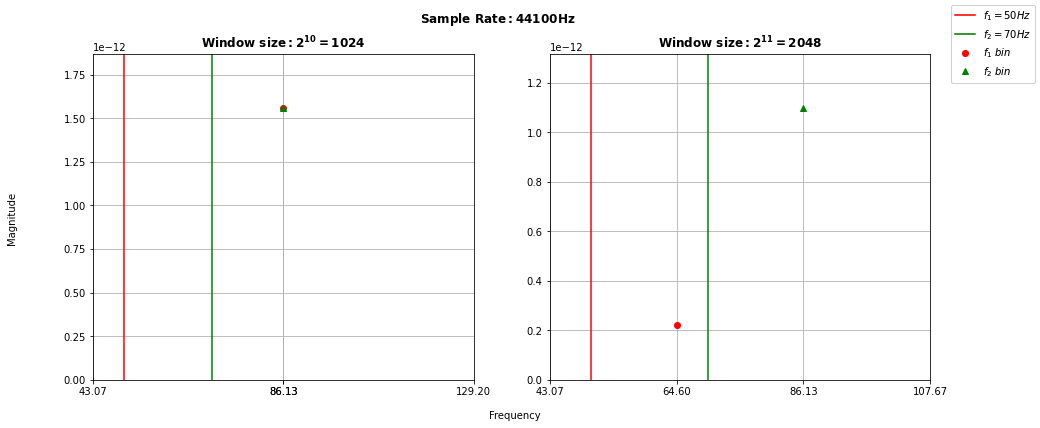

In [29]:
fs = 44100
f1 = 50 
f2 = 70

fig, plots = plt.subplots(1,2,figsize=(15,6))#, sharex=True)
fig.text(0.05,0.5, "Magnitude", ha="center", va="center", rotation=90)
fig.text(0.515,0.03, "Frequency", ha="center", va="bottom")

if fs==44100//4:
    power_of_2 = 8
elif fs==44100//2:
    power_of_2 = 9
else:
    power_of_2 = 10


for i in range(2):

    w_size = 2**power_of_2
    bins = w_size
    res = fs//w_size
#     print(res)
    t = np.arange(fs)/fs
    s1 = np.sin( 2*np.pi*f1*t ) 
    s2 = np.sin( 2*np.pi*f2*t ) 
    signal = s1 + s2

    fft_signal = np.fft.fft( signal )
    mag_signal = np.sqrt( np.power( fft_signal.real , 2 ) + np.power( fft_signal.imag , 2 ) )
    mag_signal = mag_signal[:w_size//2]
    freq_bins_signal = np.linspace(0,fs,bins, endpoint=False)
    freq_bins_signal = freq_bins_signal[:w_size//2]

    plots[i].grid(True)
    plots[i].title.set_text(r"$\bf{Window\ size: 2^{%d} = %d\ }$"%(power_of_2,w_size))
#         plots[i].plot( freq_bins_signal , mag_signal )
    ax1, = plots[i].plot( 0*freq_bins_signal + f1, freq_bins_signal, "r", label='$f_1=%dHz$'%(f1) )
    ax2, = plots[i].plot( 0*freq_bins_signal + f2, freq_bins_signal, "g", label='$f_2=%dHz$'%(f2) )

    #bins of max magnitude (first 4)
    mag_signal_values = np.sort(mag_signal)[::-1]
    bins_max_mag = [i for i in range(mag_signal.size) if mag_signal[i] in mag_signal_values[:4]]

    f1_closest_index = min(range(len(freq_bins_signal)), key=lambda i: freq_bins_signal[i]-f1 if freq_bins_signal[i]-f1 > 0 else res)
    f2_closest_index = min(range(len(freq_bins_signal)), key=lambda i: freq_bins_signal[i]-f2 if freq_bins_signal[i]-f2 > 0 else res)

    x_axis_to_plot = [ f1_closest_index-1, f1_closest_index, f2_closest_index, f2_closest_index+1]
    x_values_to_plot = []
    x_values_to_plot.extend(freq_bins_signal[x_axis_to_plot].tolist())

    plots[i].set_xlim(x_values_to_plot[0],x_values_to_plot[-1])#freq_bins_signal[x_axis_to_plot[-1]])
    plots[i].set_ylim(0,1.2*max( mag_signal[f1_closest_index], mag_signal[f2_closest_index]))
    plots[i].set_xticks(x_values_to_plot)

    #plot points
    p_f1, = plots[i].plot(freq_bins_signal[f1_closest_index] , mag_signal[f1_closest_index], "ro", label="$f_1\ bin$" )
    p_f2, = plots[i].plot(freq_bins_signal[f2_closest_index] , mag_signal[f2_closest_index], "g^", label="$f_2\ bin$" )

    fig.legend(handles=[ax1,ax2,p_f1,p_f2])

    power_of_2 += 1
        
fig.suptitle(r"$\bf{Sample\ Rate: %dHz}$"%(fs))



<h2>Task 3</h2>

In [183]:
import librosa
import librosa.display
from scipy.io.wavfile import write

fs = 44100
my_hop_length = 1024
fft_window = 2048

sr_a, a = wf.read('./data/smurfs.wav')
smurfs_original = a

if (a.ndim)>1:
    a = a[:,0]/ np.max ( np.abs(a) )
else:  
    a = a / np.max ( np.abs(a) )

<ipython-input-183-aea277020a57>:9: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr_a, a = wf.read('./data/smurfs.wav')


In [196]:
start = (a.shape[0]//4) +50000
stop = start + 4410*45

print(f"0.{start//fs}sec - 0.{stop//fs}sec")

if not os.path.exists('music_data'):
    os.makedirs('music_data')

0.4sec - 0.8sec


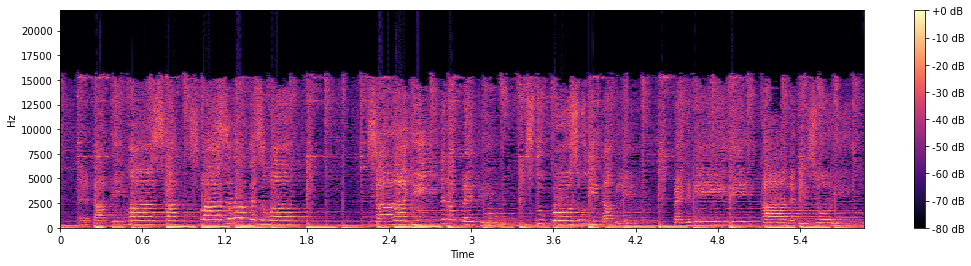

In [185]:
#unfiltered audio
audio_fft = librosa.stft(a, fft_window, my_hop_length)
db_fft = librosa.amplitude_to_db( np.abs(audio_fft), ref=np.max )

#plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,4))
img = librosa.display.specshow(db_fft, sr=fs, x_axis='time', y_axis='linear', ax = ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [186]:
#play unfiltered audio
sd.play( a[start:stop] , 44100 )
sd.wait()
write("./music_data/smurfs_original.wav", fs, a[start:stop])

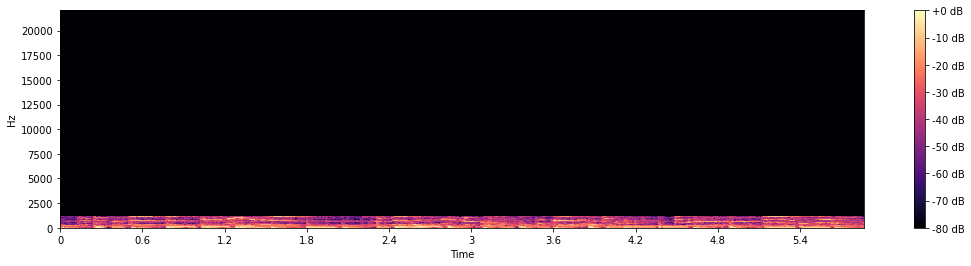

In [187]:
#filtered audio - low pass
audio_fft_low = np.copy(audio_fft)
audio_fft_low[59:, :] = 0
db_fft_low = librosa.amplitude_to_db( np.abs(audio_fft_low), ref=np.max )
audio_ifft_low = librosa.istft(audio_fft_low, hop_length=my_hop_length)

#plot
fig, ax_low = plt.subplots(nrows=1, ncols=1, figsize=(18,4))
img_low = librosa.display.specshow(db_fft_low, sr=fs, x_axis='time', y_axis='linear', ax = ax_low)
fig.colorbar(img, ax=ax_low, format="%+2.f dB")

In [188]:
#play filtered audio - low pass
sd.play( audio_ifft_low[start:stop] , 44100 )
sd.wait()
write("./music_data/smurfs_low.wav", fs, audio_ifft_low[start:stop])

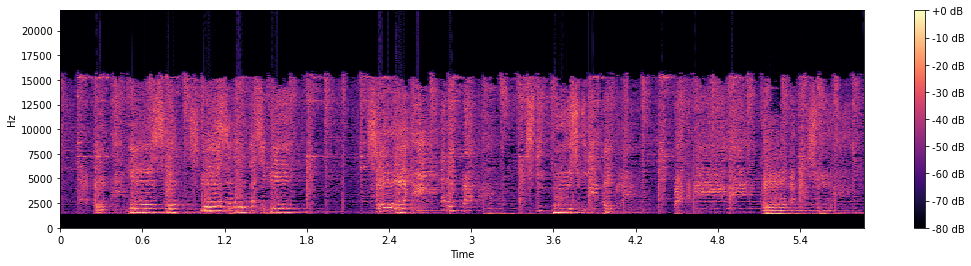

In [189]:
#filtered audio - high pass
audio_fft_high = np.copy(audio_fft)
audio_fft_high[:70, :] = 0
db_fft_high = librosa.amplitude_to_db( np.abs(audio_fft_high), ref=np.max )
audio_ifft_high = librosa.istft(audio_fft_high, hop_length=my_hop_length)

#plot
fig, ax_high = plt.subplots(nrows=1, ncols=1, figsize=(18,4))
img_high = librosa.display.specshow(db_fft_high, sr=fs, x_axis='time', y_axis='linear', ax = ax_high)
fig.colorbar(img_high, ax=ax_high, format="%+2.f dB")

In [190]:
#play filtered audio - high pass
sd.play( audio_ifft_high[start:stop] , 44100 )
sd.wait()
write("./music_data/smurfs_high.wav", fs, audio_ifft_high[start:stop])

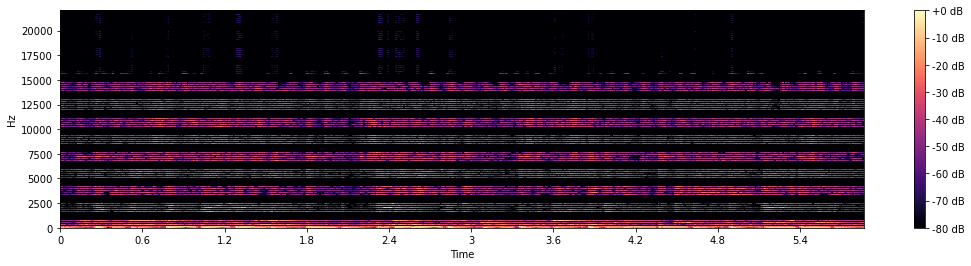

In [191]:
#filtered audio - experimenting vol.1
audio_fft_exp = np.copy(audio_fft)
for i in range(1,audio_fft_exp.shape[0]):
    audio_fft_exp[10*i:10*i+7, :] = 0

db_fft_exp = librosa.amplitude_to_db( np.abs(audio_fft_exp), ref=np.max )
audio_ifft_exp = librosa.istft(audio_fft_exp, hop_length=my_hop_length)

#plot
fig, ax_exp = plt.subplots(nrows=1, ncols=1, figsize=(18,4))
img_exp = librosa.display.specshow(db_fft_exp, sr=fs, x_axis='time', y_axis='linear', ax = ax_exp)
fig.colorbar(img_exp, ax=ax_exp, format="%+2.f dB")

In [192]:
#play filtered audio - experiment 1
sd.play( audio_ifft_exp[start:stop] , 44100 )
sd.wait()
write("./music_data/smurfs_exp.wav", fs, audio_ifft_exp[start:stop])

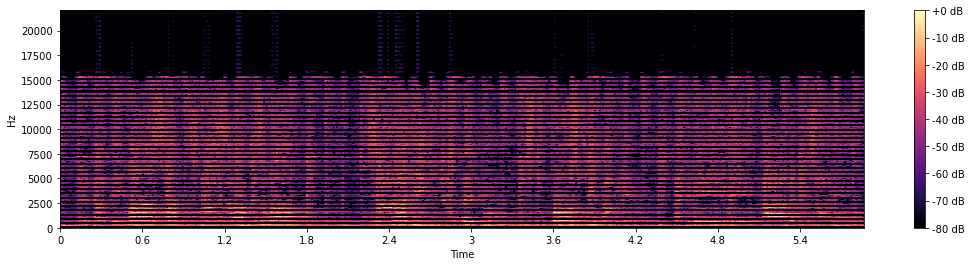

In [193]:
#filtered audio - experimenting vol.2
audio_fft_exp2 = np.copy(audio_fft)
# print(audio_fft_exp.shape[0])

for i in range(0,audio_fft_exp.shape[0]):
    audio_fft_exp2[20*i:20*i+10, :] = 0

db_fft_exp2 = librosa.amplitude_to_db( np.abs(audio_fft_exp2), ref=np.max )
audio_ifft_exp2 = librosa.istft(audio_fft_exp2, hop_length=my_hop_length)

#plot
fig, ax_exp2 = plt.subplots(nrows=1, ncols=1, figsize=(18,4))
img_exp2 = librosa.display.specshow(db_fft_exp2, sr=fs, x_axis='time', y_axis='linear', ax = ax_exp2)
fig.colorbar(img_exp2, ax=ax_exp2, format="%+2.f dB")

In [194]:
#play filtered audio - experiment 2
sd.play( audio_ifft_exp2[start:stop] , 44100 )
sd.wait()
write("./music_data/smurfs_exp2.wav", fs, audio_ifft_exp2[start:stop])

<h2>Testing (ignore)</h2>